In [2]:
import gym
import seagul.envs
#gym.make('su_acro_drake-v0')

import pickle
import torch.utils.data

from seagul.rl.run_utils import load_model, load_workspace
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from seagul.rl.models import PpoModel, switchedPpoModel, SwitchedPpoModelActHold
from seagul.nn import MLP
from seagul.rl.run_utils import load_model, load_workspace

torch.set_default_dtype(torch.double)

seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils
seagul.rl.run_utils


Text(0.5, 1.0, 'Reward curve, Vanilla PPO')

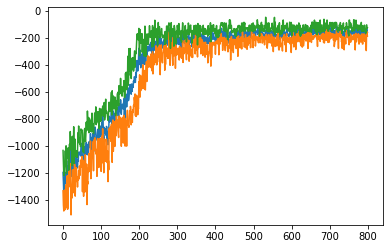

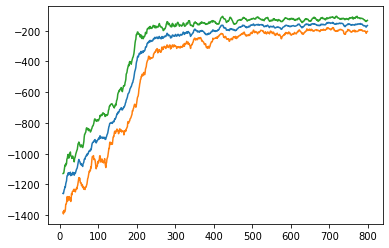

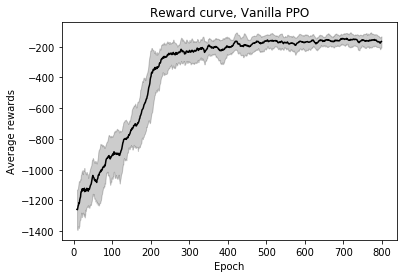

In [8]:
seeds = [4,5,6,7]; load_paths =  ['./data/sym_comp/ppo' + str(seed) for seed in seeds]
#seeds = [6,7,8,9]; load_pseeds = [6,7,8,9]; load_paths =  ['./data/drake_acro_switch2/500_nhb' + str(seed) for seed in seeds]
#seeds = [0]; load_paths = ['./data/drake_acro_final/warm_seed' + str(seed) for seed in seeds]

model, env, args, ws = load_workspace(load_paths[0])
num_steps = ws['num_epochs']
#num_steps = 1000

avg_rewards = np.zeros((num_steps,))
rewards = np.zeros((num_steps,4))

for i, load_path in enumerate(load_paths):
    model, env, args, ws = load_workspace(load_path)
    
    avg_rewards += np.array((ws['avg_reward_hist']))
    rewards[:,i] = np.array((ws['avg_reward_hist']))
    #append(ws['avg_reward_hist'])
    #plt.title('reward vs epoch')
    #plt.figure()
    #plt.plot(ws['a'])
    #plt.figure()
    #plt.plot(ws['p_loss_hist'])
    #plt.figure()
    #plt.plot(ws['v_loss_hist'])
    #print(ws['num_states'])
    
avg_rewards /= len(seeds)
min_rewards = [np.min(rewards[i,:]) for i in range(num_steps)]
max_rewards = [np.max(rewards[i,:]) for i in range(num_steps)]
plt.plot(avg_rewards)
plt.plot(min_rewards)
plt.plot(max_rewards)

rewards_smoothed = pd.Series(avg_rewards).rolling(10, min_periods=10).mean()
min_smoothed =  pd.Series(min_rewards).rolling(10, min_periods=10).mean()
max_smoothed =  pd.Series(max_rewards).rolling(10, min_periods=10).mean()

plt.figure()
plt.plot(rewards_smoothed)
plt.plot(min_smoothed)
plt.plot(max_smoothed)

plt.figure()

epochs = [t for t in range(num_steps)]
plt.plot(rewards_smoothed[1:1200], color='k')
plt.fill_between(epochs[1:1200], min_smoothed[1:1200], max_smoothed[1:1200], color='k',alpha=.2 )
plt.xlabel('Epoch')
plt.ylabel('Average rewards')
plt.title('Reward curve, Vanilla PPO')

#plt.figure()
#plt.plot(np.array(ws['ep_path_tensor']))